### EXPLORATORY DATA ANALYSIS ON A DATASET

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Tasks:
1.	Data Cleaning and Preparation:


Load the dataset into a DataFrame or equivalent data structure.

In [2]:
df = pd.read_csv("Cardiotocographic.csv")
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [3]:
df.shape

(2126, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


Handle missing values appropriately 

In [5]:
df.isnull().values.any()  ## To check the missing values are present or not in a dataframe

True

In [6]:
df.isnull().sum()  ## To get the column-wise missing values


LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [7]:
df.isnull().sum().sum()  ## To get the total number of missing values in the dataframe

167

As the missing values are very less ,we are remove those values from the dataset 

In [8]:
df.dropna(inplace=True)
df.shape

(2105, 14)

After the removal of the null values, we can see the shape of the dataframe has been reduced by 21 rows when compared with the original shape of the dataframe .

Identify and correct any inconsistencies in data types 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2105 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2105 non-null   float64
 2   FM        2105 non-null   float64
 3   UC        2105 non-null   float64
 4   DL        2105 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2105 non-null   float64
 8   MSTV      2105 non-null   float64
 9   ALTV      2105 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 246.7 KB


So by looking at the above Dtypes we can say that there is no strings type data present in the Cardiotocographic.csv and the datatypes are correct based on the column.
Hence we can say that the columns are consistent.

Detect and treat outliers if necessary.

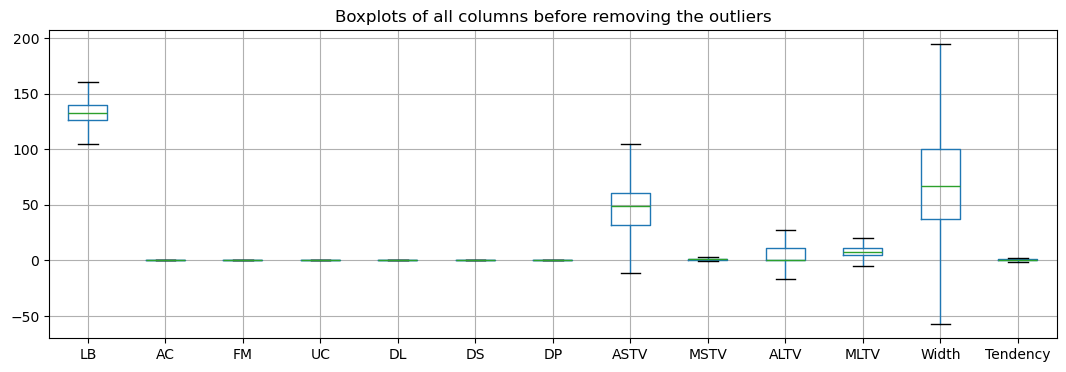

Dataset size before removing the outliers (2105, 14)


In [32]:
df_subset = df.iloc[:,:13]
df_subset.boxplot(figsize=(13,4))
plt.title("Boxplots of all columns before removing the outliers")
plt.show()
print("Dataset size before removing the outliers",df.shape)

In [ ]:
#################################################################################################3

In [28]:
## To treat the outliers ,I am using outlier capping method 
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound= Q1-1.5*IQR
    upper_bound= Q3+1.5*IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)] 
for col in df.columns:
    df = outlier_capping(df, col)

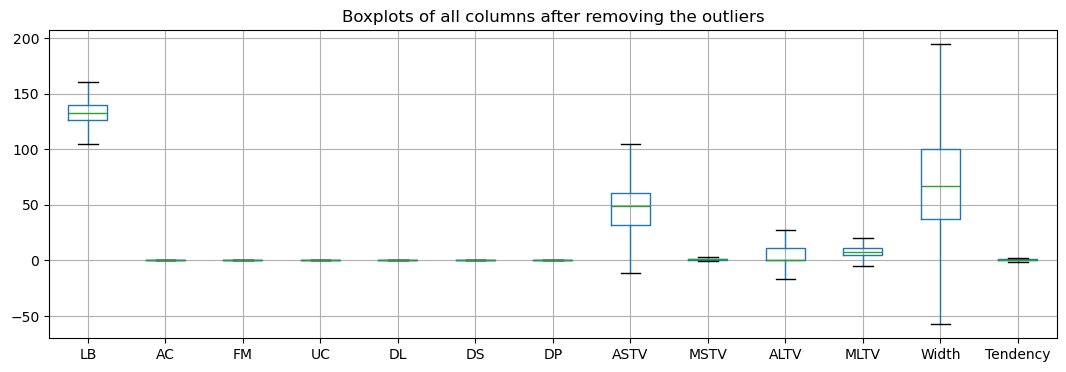

Dataset size after removing the outliers (2105, 14)


In [33]:
df_subset =df.iloc[:,:13]
df_subset.boxplot(figsize=(13,4))
plt.title("Boxplots of all columns after removing the outliers")
plt.show()
print("Dataset size after removing the outliers",df.shape)

##### 2.Statistical Summary: